# CardioVascular Disease Prediction Model

This model predicts wheather a person has CardioVascular disease or is no longer under Cardiovascular disease danger.

# Dataset:
https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

The dataset consists of 70 000 records of patients data, 11 features + target.

Features:

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

# Data Processing

In [1]:
# import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os


**Getting the dataset into a Dataframe using pandas**

In [2]:
dataset = pd.read_csv('cardio_train.csv',sep=';')

In [3]:
dataset.shape

(70000, 13)

In [4]:
dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


**In the above information about dataset we can see that ap_hi and ap_lo has negative values which are not useful for our prediction so we will romove those rows from our dataset**

In [6]:
for i in dataset.index:
    if dataset['ap_hi'][i]<0 or dataset['ap_lo'][i]<0:
        print(dataset['ap_hi'][i] , dataset['ap_lo'][i])
        dataset.drop(i, inplace= True)

-100 80
-115 70
-100 70
-140 90
-120 80
-150 80
-120 80
15 -70


In [7]:
dataset.shape

(69992, 13)

**Converting age into years**

In [8]:
# The age in the dataset is given in the days, we will convert that into years
dataset['age'] = dataset['age']/365
dataset['age'] = dataset['age'].astype('int')

In [9]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


**As we know id is not a useful parameter for our model so we can drop that from our dataset**

In [10]:
## Dropping the id column
dataset = dataset.drop(columns = ['id'])

In [11]:
dataset.shape

(69992, 12)

In [12]:
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


**Making gender values as binaray**

  - 0: Male
  - 1: Female

In [13]:
dataset['gender'] = dataset['gender']%2

In [14]:
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,0,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,0,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


**Seperating the dependent and independent Columns**
- Cardio : Dependent Column
- Rest All : Independent Columns 

In [15]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
dataset['height'] = s.fit_transform(dataset[['height']]) 

In [16]:
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,0,0.443417,62.0,110,80,1,1,0,0,1,0
1,55,1,-1.018150,85.0,140,90,3,1,0,0,1,1
2,51,1,0.078025,64.0,130,70,3,1,0,0,0,1
3,48,0,0.565214,82.0,150,100,1,1,0,0,1,1
4,47,1,-1.018150,56.0,100,60,1,1,0,0,0,0


In [17]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [18]:
y.shape

(69992,)

In [19]:
print(X)

[[50.          0.          0.44341714 ...  0.          0.
   1.        ]
 [55.          1.         -1.01815023 ...  0.          0.
   1.        ]
 [51.          1.          0.0780253  ...  0.          0.
   0.        ]
 ...
 [52.          0.          2.27037634 ...  0.          1.
   0.        ]
 [61.          1.         -0.16556927 ...  0.          0.
   0.        ]
 [56.          1.          0.6870117  ...  0.          0.
   1.        ]]


In [20]:
print(y)

[0 1 1 ... 1 1 0]


In [21]:
counts = np.bincount(y)

In [22]:
print(counts)

[35017 34975]


In [23]:
print(f"0 count = {counts[0]}")
print(f"1 count = {counts[1]}")

0 count = 35017
1 count = 34975


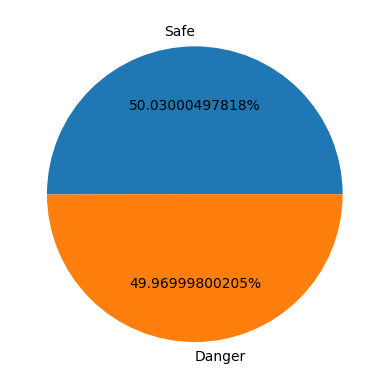

In [24]:
remarks = ['Safe','Danger']
plt.pie(counts,labels = remarks, autopct = '%1.11f%%')
plt.show()

**Splitting the data into train and test in ratio 8:2** 

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

In [26]:
print(X_train.shape, Y_train.shape)

(55993, 11) (55993,)


In [27]:
print(X_test.shape,Y_test.shape)

(13999, 11) (13999,)


# Now we will use different binary classification Algorithms and store accuracy of each Algorithm in a array and select the best Algorithm

In [28]:
# to store the accuracy of the different algorithms
Accuracy = {}

In [29]:
# importing the accuracy_score methode from Scikit-Learn Library to calculate accuracy of models 
from sklearn.metrics import accuracy_score

# 1. Logisitic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state =0)
lr.fit(X_train,Y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [31]:
Y_pred = lr.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 1]
 [0 1]
 [0 1]
 ...
 [1 1]
 [1 1]
 [0 0]]


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[4611 2364]
 [2801 4223]]


0.6310450746481892

In [33]:
acc_lr = round(accuracy_score(Y_test,Y_pred)*100,2)
Accuracy["Logistic regression"]=acc_lr
print("The accuracy score for Logistic Regression Algorithm is " + str(acc_lr) + "%")

The accuracy score for Logistic Regression Algorithm is 63.1%


# 2. Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, Y_train)

GaussianNB()

In [35]:
Y_pred = NB.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 0]]


In [36]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[6161  814]
 [4892 2132]]


0.5923994571040788

In [37]:
acc_nb = round(accuracy_score(Y_pred,Y_test)*100,2)
Accuracy["Naive Bayes"]=acc_nb
print("The accuracy score for Logistic Regression Algorithm is " + str(acc_nb) + "%")

The accuracy score for Logistic Regression Algorithm is 59.24%


# 3. K Nearest Neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2)
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=20)

In [39]:
Y_pred = KNN.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 1]
 [0 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [0 0]]


In [40]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[5476 1499]
 [2450 4574]]


0.717908422030145

In [41]:
acc_knn = round(accuracy_score(Y_test,Y_pred)*100,2)
Accuracy["K Nearest Neighbors"]=acc_knn
print("The accuracy score for K Nearest Neighbors Algorithm is " + str(acc_knn) + "%")

The accuracy score for K Nearest Neighbors Algorithm is 71.79%


# 4. Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [43]:
Y_pred = DT.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 1]
 [0 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [0 0]]


In [44]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[4637 2338]
 [2663 4361]]


0.6427601971569398

In [45]:
acc_dt = round(accuracy_score(Y_test, Y_pred)*100,2)
Accuracy["Decision Tree"]=acc_dt
print("The accuracy score for K Nearest Neighbors Algorithm is " + str(acc_dt) + "%")

The accuracy score for K Nearest Neighbors Algorithm is 64.28%


# 5. Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=21)
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=21)

In [47]:
Y_pred = rf.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 1]
 [0 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [0 0]]


In [48]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[5049 1926]
 [2132 4892]]


0.7101221515822559

In [49]:
acc_rf = round(accuracy_score(Y_pred,Y_test)*100,2)
Accuracy["Random Forest"]=acc_rf
print("The accuracy score for K Nearest Neighbors Algorithm is " + str(acc_rf) + "%")

The accuracy score for K Nearest Neighbors Algorithm is 71.01%


# 6. Neural Network

In [54]:
import tensorflow as tf


ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, input_shape=(11,), activation='relu')) 
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model with appropriate metrics
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


# Fit the model
results = ann.fit(X_train, Y_train, epochs=300, batch_size=256, validation_split=0.2)  # Added validation split for monitoring

Epoch 1/300
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5507 - loss: 1.5816 - precision_4: 0.5439 - recall_4: 0.5963 - val_accuracy: 0.6051 - val_loss: 0.7801 - val_precision_4: 0.6167 - val_recall_4: 0.5557
Epoch 2/300
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5925 - loss: 0.6973 - precision_4: 0.5988 - recall_4: 0.5776 - val_accuracy: 0.6236 - val_loss: 0.7117 - val_precision_4: 0.6397 - val_recall_4: 0.5663
Epoch 3/300
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6040 - loss: 0.6919 - precision_4: 0.6054 - recall_4: 0.5777 - val_accuracy: 0.6179 - val_loss: 0.6739 - val_precision_4: 0.7477 - val_recall_4: 0.3561
Epoch 4/300
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6224 - loss: 0.6639 - precision_4: 0.6260 - recall_4: 0.6058 - val_accuracy: 0.6343 - val_loss: 0.6618 - val_precision_4: 0.6121 - val_recall_4: 0.7334
Epoch 5/300
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6277 - loss: 0.6586 - precision_4: 0.6325 - recall_4: 0.6

In [56]:
Y_pred = ann.predict(X_test)

# rounding the prediction nn_pred to zeros and ones, and rehaping into 1d array
rounded = [round(x[0]) for x in Y_pred]
print(Y_pred*100,Y_pred.shape)

Y_pred = rounded



438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 9.647545]
 [18.64018 ]
 [51.948715]
 ...
 [85.9597  ]
 [77.87396 ]
 [19.168587]] (13999, 1)


In [57]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[5324 1651]
 [2043 4981]]


0.7361240088577755

In [59]:
acc_rf = round(accuracy_score(Y_pred,Y_test)*100,2)
Accuracy["Random Forest"]=acc_rf
print("The accuracy score for K Nearest Neighbors Algorithm is " + str(acc_rf) + "%")

The accuracy score for K Nearest Neighbors Algorithm is 73.61%


# Comparing the accuracy of all the above algorithms and using the best Model

{'Logistic regression': 63.1, 'Naive Bayes': 59.24, 'K Nearest Neighbors': 71.79, 'Decision Tree': 64.28, 'Random Forest': 73.61}


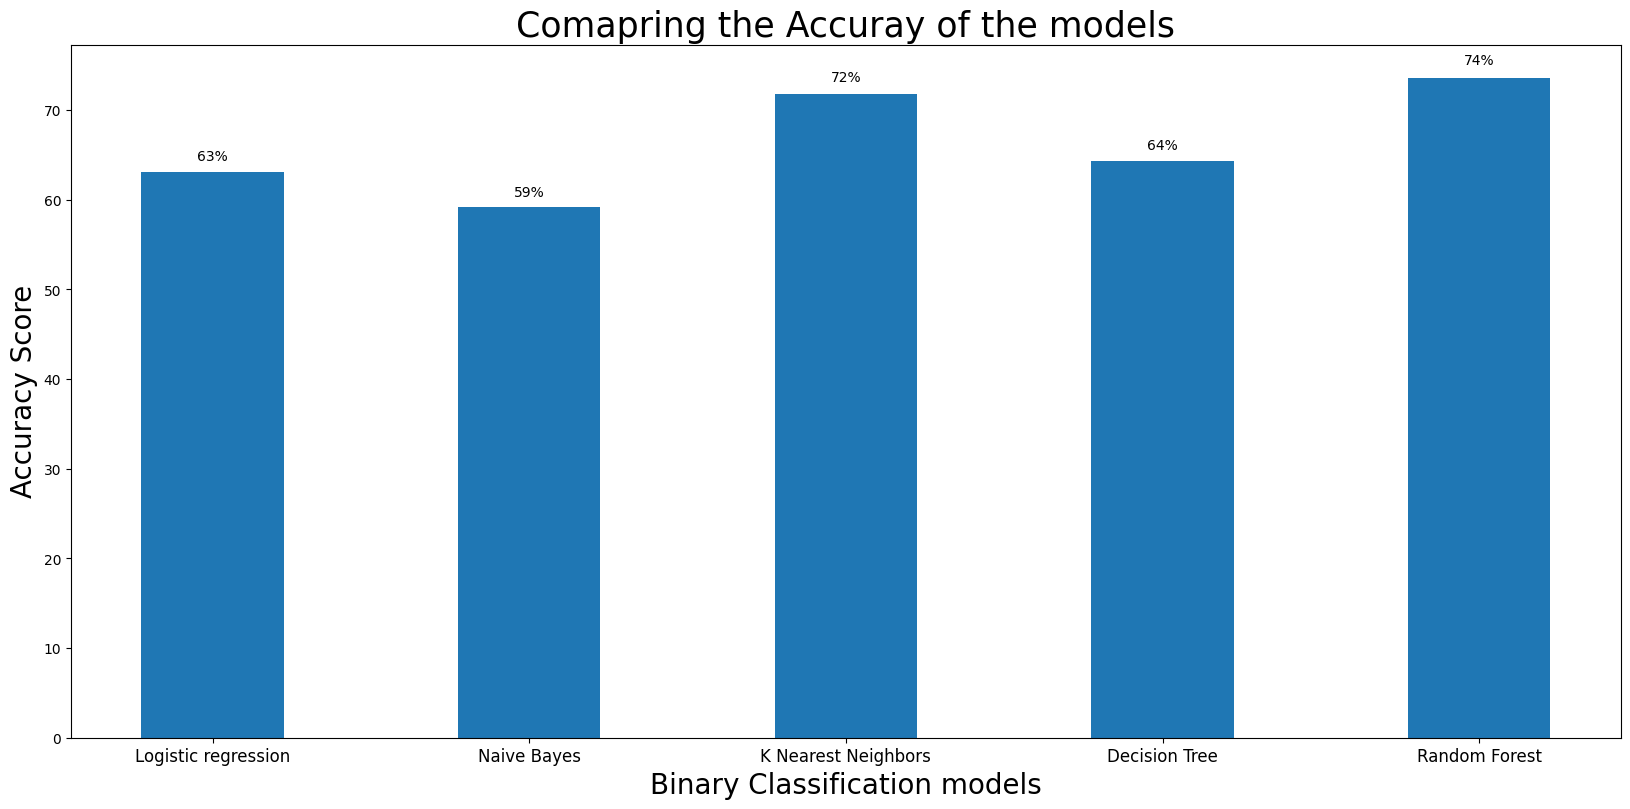

In [60]:
print(Accuracy)
plt.figure(figsize=(20, 9))
fig=plt.bar(range(len(Accuracy)), list(Accuracy.values()), align='center', width=0.45)
plt.xticks(range(len(Accuracy)), list(Accuracy.keys()),fontsize=12)
plt.xlabel("Binary Classification models", fontsize=20)
plt.ylabel("Accuracy Score", fontsize=20)
plt.title("Comapring the Accuray of the models", fontsize=25)

for p in fig:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate(f'{height/100.0:.0%}', (x + width/2, y + height*1.02), ha='center')

# saving the plot for using in th report
plt.savefig('compAlgo.png')
plt.show()